# Задание 6

И напоследок давайте выясним, на какой день доход от заказов покупателей, пришедших после первой рекламной кампании, превысил расходы на их привлечение. Для этого рассчитаем накопительный ARPPU и сравним его с уже посчитанной ранее метрикой CAC. Сделаем это для двух кампаний, чтобы точно убедиться, что в случае второй рекламной кампании затраты мы пока не окупили.

Суть расчёта накопительного ARPPU заключается в том, что для каждого дня число покупателей в когорте будет оставаться неизменным, а полученный от их заказов доход — расти. В результате накопительный ARPPU будет постепенно увеличиваться и в какой-то момент превысит сумму изначальных затрат на привлечение одного покупателя.

Задание:

Для каждой рекламной кампании для каждого дня посчитайте две метрики:

1. Накопительный ARPPU.

2. Затраты на привлечение одного покупателя (CAC).

Колонку с наименованиями кампаний назовите ads_campaign, колонку с днями — day, а колонки со значениями метрик — cumulative_arppu и cac.

Значения метрики CAC укажите одинаковым для всех дней (это необходимо для наглядной визуализации).

Наименования кампаний выведите в следующем виде:

1. Кампания № 1
2. Кампания № 2


Дни пронумеруйте начиная с 0 и отобразите в следующем формате: Day 0, Day 1, Day 2 и т.д.


Полученные значения метрик необходимо округлить до двух знаков после запятой.

Результат должен быть отсортирован сначала по наименованию кампании (по возрастанию), затем по наименованию дня (также по возрастанию).

Поля в результирующей таблице: ads_campaign, day, cumulative_arppu, cac

```sql
WITH main_table AS (SELECT ads_campaign,
                           user_id,
                           order_id,
                           time,
                           product_id,
                           price
                    FROM   (SELECT ads_campaign,
                                   user_id,
                                   order_id,
                                   time
                            FROM   (SELECT user_id,
                                           order_id,
                                           time,
                                           CASE WHEN user_id IN (8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741, 
                                                8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845, 
                                                8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972, 
                                                8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071, 
                                                9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175, 
                                                9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317, 
                                                9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472, 
                                                9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550, 
                                                9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654, 
                                                9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762, 
                                                9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871, 
                                                9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998, 
                                                9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103, 
                                                10105, 10122, 10134, 10135) then 1
                                                WHEN user_id IN (8629, 8630, 8644, 8646, 8650, 8655, 8659, 8660, 8663, 8665, 8670, 8675, 8680, 8681, 
                                                8682, 8683, 8694, 8697, 8700, 8704, 8712, 8713, 8719, 8729, 8733, 8742, 8748, 8754, 
                                                8771, 8794, 8795, 8798, 8803, 8805, 8806, 8812, 8814, 8825, 8827, 8838, 8849, 8851, 
                                                8854, 8855, 8870, 8878, 8882, 8886, 8890, 8893, 8900, 8902, 8913, 8916, 8923, 8929, 
                                                8935, 8942, 8943, 8949, 8953, 8955, 8966, 8968, 8971, 8973, 8980, 8995, 8999, 9000, 
                                                9007, 9013, 9041, 9042, 9047, 9064, 9068, 9077, 9082, 9083, 9095, 9103, 9109, 9117, 
                                                9123, 9127, 9131, 9137, 9140, 9149, 9161, 9179, 9181, 9183, 9185, 9190, 9196, 9203, 
                                                9207, 9226, 9227, 9229, 9230, 9231, 9250, 9255, 9259, 9267, 9273, 9281, 9282, 9289, 
                                                9292, 9303, 9310, 9312, 9315, 9327, 9333, 9335, 9337, 9343, 9356, 9368, 9370, 9383, 
                                                9392, 9404, 9410, 9421, 9428, 9432, 9437, 9468, 9479, 9483, 9485, 9492, 9495, 9497, 
                                                9498, 9500, 9510, 9527, 9529, 9530, 9538, 9539, 9545, 9557, 9558, 9560, 9564, 9567, 
                                                9570, 9591, 9596, 9598, 9616, 9631, 9634, 9635, 9636, 9658, 9666, 9672, 9684, 9692, 
                                                9700, 9704, 9706, 9711, 9719, 9727, 9735, 9741, 9744, 9749, 9752, 9753, 9755, 9757, 
                                                9764, 9783, 9784, 9788, 9790, 9808, 9820, 9839, 9841, 9843, 9853, 9855, 9859, 9863, 
                                                9877, 9879, 9880, 9882, 9883, 9885, 9901, 9904, 9908, 9910, 9912, 9920, 9929, 9930, 
                                                9935, 9939, 9958, 9959, 9961, 9983, 10027, 10033, 10038, 10045, 10047, 10048, 10058, 
                                                10059, 10067, 10069, 10073, 10075, 10078, 10079, 10081, 10092, 10106, 10110, 10113, 10131) then 2
                                                ELSE 0 END AS ads_campaign,
                                           COUNT(action) FILTER (WHERE action = 'cancel_order') OVER (PARTITION BY order_id) AS is_canceled
                                    FROM   user_actions) t1
                            WHERE  ads_campaign IN (1, 2)
                               AND is_canceled = 0) t2
                        LEFT JOIN (SELECT order_id,
                                          unnest(product_ids) AS product_id
                                   FROM   orders) t3 using (order_id)
                        LEFT JOIN products using (product_id))
SELECT CONCAT('Кампания № ', ads_campaign) AS ads_campaign,
       CONCAT('Day ', ROW_NUMBER() OVER (PARTITION BY ads_campaign
                                         ORDER BY date) - 1) AS day,
       round(SUM(revenue) OVER (PARTITION BY ads_campaign
                                ORDER BY date) / paying_users::decimal, 2) AS cumulative_arppu,
       cac
FROM   (SELECT ads_campaign,
               time::date AS date,
               SUM(price) AS revenue
        FROM   main_table
        GROUP BY ads_campaign, time::date) t1
    LEFT JOIN (SELECT ads_campaign,
                      count(DISTINCT user_id) AS paying_users,
                      round(250000.0 / count(DISTINCT user_id), 2) AS cac
               FROM   main_table
               GROUP BY ads_campaign) t2 using  (ads_campaign);




```

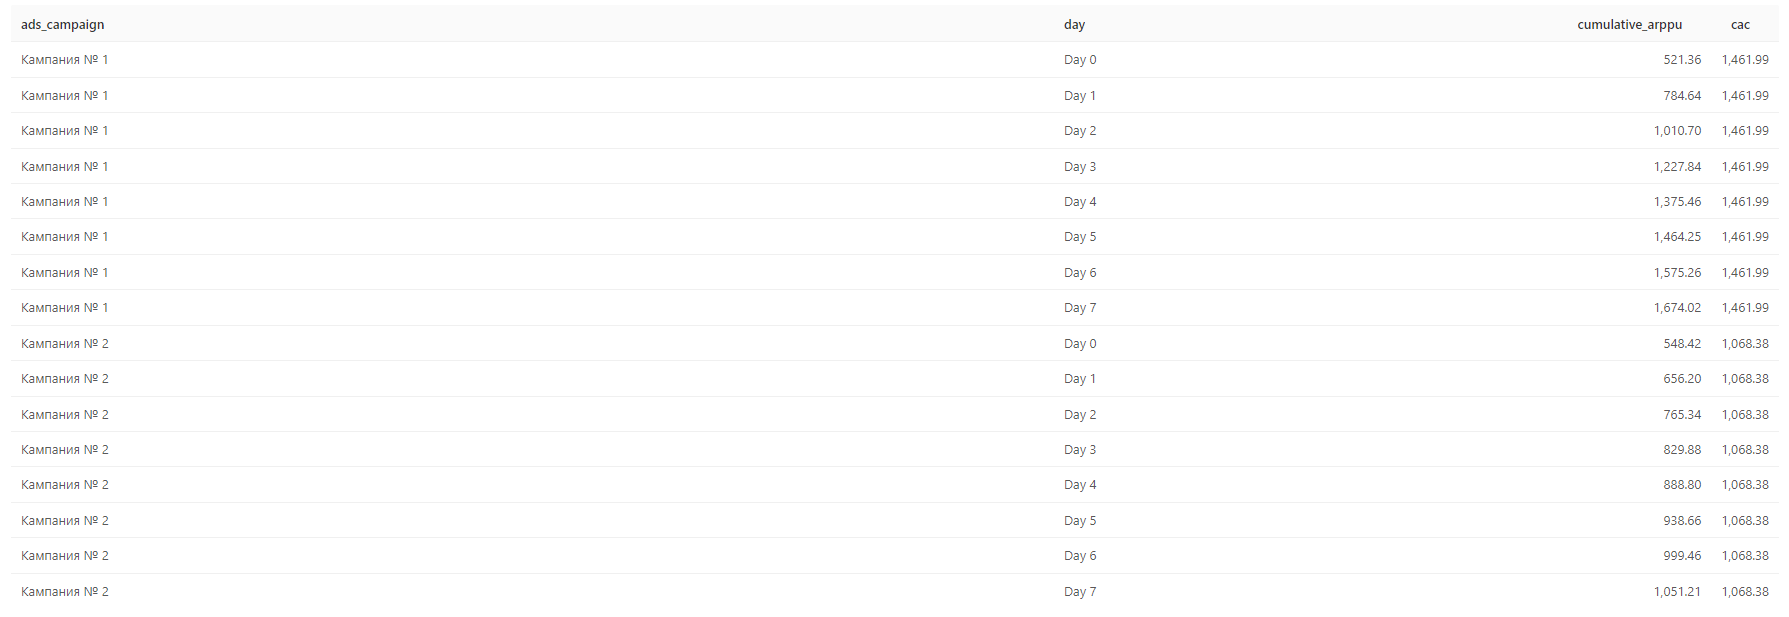

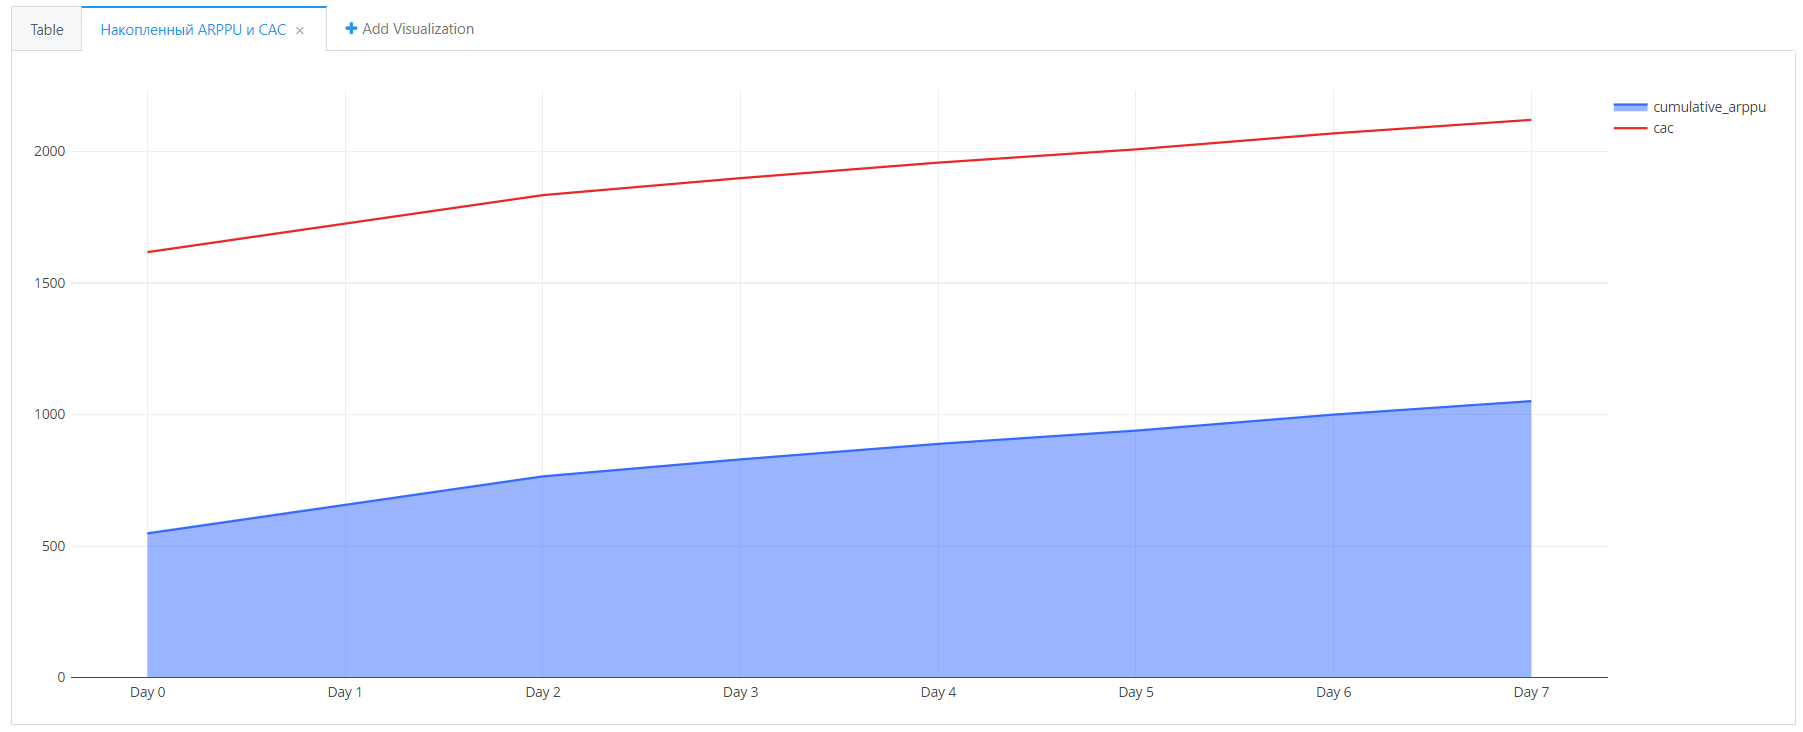